In [86]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [8]:
# Configurar o diretório do Kaggle
kaggle_dir = '/root/.kaggle'
os.makedirs(kaggle_dir, exist_ok=True)

# Mover o arquivo kaggle.json para o diretório apropriado
!cp kaggle.json {kaggle_dir}/
!chmod 600 {kaggle_dir}/kaggle.json

In [9]:
!kaggle competitions download -c 'titanic'

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 57.7MB/s]


In [10]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [11]:
!rm titanic.zip

In [12]:
data = pd.read_csv('/content/train.csv')

In [13]:
data.shape

(891, 12)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
y = data['Survived']

In [16]:
x = data.drop('Survived', axis = 1)

In [17]:
x_test = pd.read_csv('test.csv') #test

In [18]:
x_test.shape

(418, 11)

In [19]:
x = pd.concat([x, x_test], axis=0, ignore_index = True)

In [20]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
x.shape

(1309, 11)

In [22]:
x.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [23]:
x = x.drop(columns = ['Cabin'])

In [24]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [25]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
x['Surname'] = x['Name'].str.split(',').str[0]

In [27]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Surname
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen


In [28]:
#age posso colocar media, mediana ou outra tecnica

#interpolacao

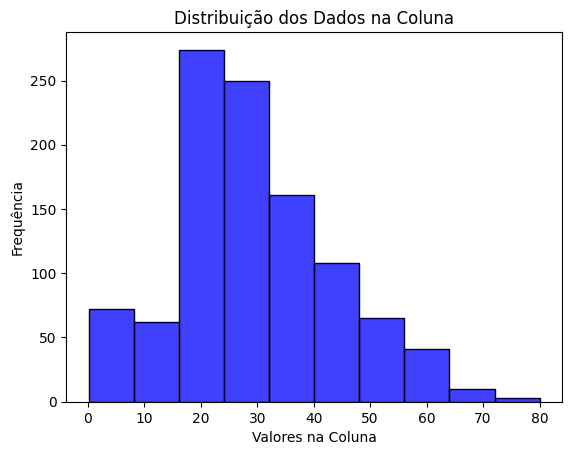

In [29]:
sns.histplot(x['Age'], bins=10, kde=False, color='blue')
plt.title('Distribuição dos Dados na Coluna')
plt.xlabel('Valores na Coluna')
plt.ylabel('Frequência')
plt.show()

In [30]:
x['Age'] = x['Age'].interpolate()

In [31]:
x.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
Surname        0
dtype: int64

In [32]:
x[x['Embarked'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Surname
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Icard
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Stone


In [33]:
#no caso do embarked, nan numa coluna categorica. oq fazer?

In [34]:
#aplicar ml para prever, acho que nao. sao apenas 2 registros. utilizar numa proxima

#substituir pela classe mais presente

In [35]:
x['Embarked'] = x['Embarked'].fillna(x['Embarked'].mode)

In [36]:
x.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Surname        0
dtype: int64

In [37]:
#lidar com os tickers, retirar apenas as previes, deixar um valor ditatorial para aqueles que n possuirem

In [38]:
x.loc[~x['Ticket'].str.contains(' '), 'Ticket'] = 'zxv'

In [39]:
x['Ticket'] = x['Ticket'].str.replace(r'^(.*?)\s.*$', r'\1', regex=True)

In [40]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Surname
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5,7.2500,S,Braund
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC,71.2833,C,Cumings
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2.,7.9250,S,Heikkinen
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,zxv,53.1000,S,Futrelle
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,zxv,8.0500,S,Allen


In [41]:
#aq aplicar onehotencoding(apenas nas que possuem string) dps minmaxscaler(em tudo)

In [42]:
x = x.drop(['Name', 'PassengerId'], axis = 1)

In [43]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Surname
0,3,male,22.0,1,0,A/5,7.2500,S,Braund
1,1,female,38.0,1,0,PC,71.2833,C,Cumings
2,3,female,26.0,0,0,STON/O2.,7.9250,S,Heikkinen
3,1,female,35.0,1,0,zxv,53.1000,S,Futrelle
4,3,male,35.0,0,0,zxv,8.0500,S,Allen


In [44]:
#aq aplicar onehotencoding(apenas nas que possuem string) dps minmaxscaler(em tudo)

In [45]:
len(x['Surname'].unique())

875

In [46]:
x['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [47]:
x['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6, 9])

In [48]:
colunas_para_one_hot_encoding = x.columns.difference(['Age', 'Fare'])

In [49]:
colunas_para_one_hot_encoding

Index(['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Surname', 'Ticket'], dtype='object')

In [50]:
x[colunas_para_one_hot_encoding] = x[colunas_para_one_hot_encoding].astype(str)


In [51]:
from sklearn.preprocessing import OneHotEncoder

# Selecionar as colunas para aplicar one-hot encoding
colunas_para_one_hot_encoding = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Surname', 'Ticket']

# Criar um objeto OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Ajustar e transformar as colunas selecionadas
x_encoded = pd.DataFrame(encoder.fit_transform(x[colunas_para_one_hot_encoding]))

# Adicionar as colunas dummy ao DataFrame original
x = pd.concat([x, x_encoded], axis=1)

# Remover as colunas originais que foram one-hot encoded
x = x.drop(columns=colunas_para_one_hot_encoding)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
x.head()

,Age,Fare,0,1,2,3,4,5,6,7,...,932,933,934,935,936,937,938,939,940,941
0,22.0,7.2500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38.0,71.2833,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26.0,7.9250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35.0,53.1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,35.0,8.0500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
#testar sem surname dps

In [54]:
scaler_age = MinMaxScaler()

In [55]:
scaler_fare = MinMaxScaler()

In [56]:
x['Age'] = scaler_age.fit_transform(x['Age'].values.reshape(-1, 1))

In [57]:
x['Fare'] = scaler_fare.fit_transform(x['Fare'].values.reshape(-1, 1))

In [58]:
x

,Age,Fare,0,1,2,3,4,5,6,7,...,932,933,934,935,936,937,938,939,940,941
0,0.273456,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.473882,0.139136,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.323563,0.015469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.436302,0.103644,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.436302,0.015713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.417512,0.015713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,0.486409,0.212559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1306,0.480145,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1307,0.480145,0.015713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
input_dim = x.shape[1]

In [60]:
input_dim

944

In [61]:
##aq dividir x treino e x teste

In [62]:
x.shape

(1309, 944)

In [63]:
x_treino = x.iloc[:891 , :]

In [64]:
x_treino.shape

(891, 944)

In [65]:
y.shape

(891,)

In [66]:
x_teste = x.iloc[891: , :]

In [67]:
x_teste.shape

(418, 944)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', restore_best_weights=True)

model = Sequential()

# Hidden layers
model.add(Dense(units=128, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=64, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [69]:
#ajustar os layers por causa do tamanho do input!

In [70]:
#dando fit no modelo com os dados de treinamento, divididos entre variavel dependente e variaveis independentes
historico = model.fit(x_treino, y, epochs = 50, validation_split = 0.2)

Epoch 1/50
23/23 [==============================] - 2s 17ms/step - loss: 0.8658 - accuracy: 0.6152 - val_loss: 0.5714 - val_accuracy: 0.6592
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6900 - accuracy: 0.7093 - val_loss: 0.5650 - val_accuracy: 0.6592
Epoch 3/50
23/23 [==============================] - 0s 7ms/step - loss: 0.6051 - accuracy: 0.7402 - val_loss: 0.5583 - val_accuracy: 0.6536
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5334 - accuracy: 0.7598 - val_loss: 0.5443 - val_accuracy: 0.6648
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: 0.4885 - accuracy: 0.7781 - val_loss: 0.5257 - val_accuracy: 0.6927
Epoch 6/50
23/23 [==============================] - 0s 6ms/step - loss: 0.4406 - accuracy: 0.8076 - val_loss: 0.5197 - val_accuracy: 0.7039
Epoch 7/50
23/23 [==============================] - 0s 6ms/step - loss: 0.3925 - accuracy: 0.8413 - val_loss: 0.4987 - val_accuracy: 0.7430
Epoch 8/50
23/23 [=

In [71]:
predicao = model.predict(x_teste)

14/14 [==============================] - 0s 2ms/step


In [72]:
predicao

array([[4.74426569e-03],
       [4.61304635e-01],
       [1.01206487e-03],
       [4.19262906e-05],
       [9.97547686e-01],
       [2.50294135e-04],
       [9.98632967e-01],
       [9.81664300e-01],
       [9.91856396e-01],
       [3.25209112e-04],
       [2.16002358e-04],
       [9.06441733e-03],
       [9.99706745e-01],
       [2.39405941e-04],
       [7.92394996e-01],
       [7.68320188e-02],
       [8.65253627e-01],
       [7.84221222e-04],
       [9.98789251e-01],
       [8.88052702e-01],
       [6.51810884e-01],
       [6.03287481e-04],
       [9.99858975e-01],
       [3.36260647e-01],
       [9.99867916e-01],
       [8.06252046e-06],
       [9.96488929e-01],
       [1.57322676e-03],
       [2.20245458e-02],
       [2.77440286e-05],
       [4.81847953e-03],
       [2.71074884e-02],
       [2.79178768e-01],
       [9.51425061e-02],
       [1.48997214e-02],
       [3.84664373e-03],
       [9.98936117e-01],
       [8.57726613e-04],
       [3.37068661e-04],
       [1.33004005e-03],


In [73]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [74]:
limiar = 0.5

In [76]:
predicao_binaria = (predicao > limiar).astype(int)

In [77]:
predicao_binaria

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [78]:
predicao_binaria.shape

(418, 1)

In [81]:
predicao_binaria = predicao_binaria.flatten()

In [82]:
predicao_binaria

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [83]:
predicao_binaria.shape

(418,)

In [84]:
x_teste.shape

(418, 944)

In [85]:
x_teste

,Age,Fare,0,1,2,3,4,5,6,7,...,932,933,934,935,936,937,938,939,940,941
891,0.430039,0.015282,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
892,0.586622,0.013663,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
893,0.774521,0.018909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
894,0.336089,0.016908,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
895,0.273456,0.023984,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.417512,0.015713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,0.486409,0.212559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1306,0.480145,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1307,0.480145,0.015713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [97]:
ids_passageiros = np.arange(892, 1310)

In [98]:
df_envio = pd.DataFrame({'PassengerId': ids_passageiros, 'Survived': predicao_binaria})

In [99]:
df_envio.head

<bound method NDFrame.head of      PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]>

In [100]:
df_envio.to_csv('submission.csv', index=False)